<h>**Background Information**</h>
<p>I chose this data because I have background knowledge in this domain.

**Objective**: 

To determine the probability of a certain champion winning against another champion (This can be any lane, any champion) </p>


<h>import necessary imports into the code

In [ ]:
from google.colab import files
import pandas as pd
import json
import io
from io import StringIO
import matplotlib.pyplot as plt

<h>Using files.upload, upload the necessary files (both csv and json) for the code</h>

In [ ]:
uploaded_json_champ = files.upload()

Saving champion_info.json to champion_info (1).json


In [ ]:
uploaded_json_champ2 = files.upload()

Saving champion_info_2.json to champion_info_2 (1).json


In [ ]:
uploaded_json_spell = files.upload()

Saving summoner_spell_info.json to summoner_spell_info (1).json


In [ ]:
df_champ1 = pd.read_json(io.StringIO(uploaded_json_champ.get('champion_info.json').decode('utf-8'))) 

In [ ]:
df_champ2 = pd.read_json(io.StringIO(uploaded_json_champ2.get('champion_info_2.json').decode('utf-8')))

In [ ]:
df_spell = pd.read_json(io.StringIO(uploaded_json_spell.get('summoner_spell_info.json').decode('utf-8')))

In [ ]:
df_games = pd.read_csv('/content/games.csv')

<p>Check if the code correctly brings in the right files</p>

In [ ]:
df_champ1.head()

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k..."
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':..."
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k..."


In [ ]:
df_champ2.head()

,type,version,data
Aatrox,champion,7.18.1,"{'tags': ['Fighter', 'Tank'], 'title': 'the Da..."
Ahri,champion,7.18.1,"{'tags': ['Mage', 'Assassin'], 'title': 'the N..."
Akali,champion,7.18.1,"{'tags': ['Assassin'], 'title': 'the Fist of S..."
Alistar,champion,7.18.1,"{'tags': ['Tank', 'Support'], 'title': 'the Mi..."
Amumu,champion,7.18.1,"{'tags': ['Tank', 'Mage'], 'title': 'the Sad M..."


In [ ]:
df_spell.head()

,type,version,data
1,summoner,7.17.2,"{'id': 1, 'summonerLevel': 6, 'name': 'Cleanse..."
11,summoner,7.17.2,"{'id': 11, 'summonerLevel': 10, 'name': 'Smite..."
12,summoner,7.17.2,"{'id': 12, 'summonerLevel': 6, 'name': 'Telepo..."
13,summoner,7.17.2,"{'id': 13, 'summonerLevel': 1, 'name': 'Clarit..."
14,summoner,7.17.2,"{'id': 14, 'summonerLevel': 10, 'name': 'Ignit..."


In [ ]:
df_games.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


<h>Check if the values of the 4 datasets contain NaNs or NAs. No data was missing</h>

In [ ]:
df_champ1.isnull().values.any()

False

In [ ]:
df_champ2.isnull().values.any()

False

In [ ]:
df_spell.isnull().values.any()

False

In [ ]:
df_games.isnull().values.any()

False

<h>Implemented histograms to confirm that the columns that we need (firstTower, firstRiftHerald, firstBlood, winner) have valid values.</h>

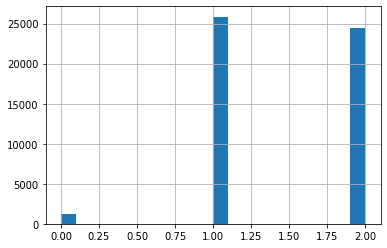

In [ ]:
hist_games = df_games.loc[:,"firstTower"].hist(bins=20)

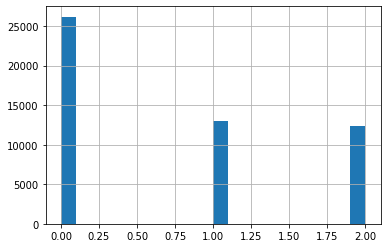

In [ ]:
hist_games2 = df_games.loc[:,"firstRiftHerald"].hist(bins=20)

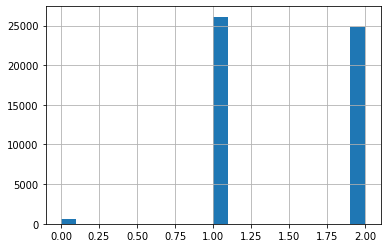

In [ ]:
hist_games3 = df_games.loc[:,"firstBlood"].hist(bins=20)

<h>Our data looks reasonable and we can proceed into further analysis</h>